In [2]:
import pandas as pd
import numpy as np
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [24]:
#get neighbour data from wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
neighbourhood = df[0]

#remove Not assigned boroughs
neighbourhood = neighbourhood[neighbourhood['Borough'] != 'Not assigned' ]
neighbourhood.reset_index(drop=True, inplace=True)

neighbourhood.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [47]:
#get more details of the neighbourhood
df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')
detailed_neighbour = df[1].iloc[1:].drop(['FM', 'Census Tracts', 'Map'], axis=1)
detailed_neighbour.reset_index(drop=True, inplace=True)
detailed_neighbour.head()

,Name,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage
0,Agincourt,44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese
1,Alderwood,11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish
2,Alexandra Park,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese
3,Allenby,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian
4,Amesbury,17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish


In [48]:
geolocator = Nominatim(user_agent='foursquare_agent')

In [71]:
# lat = []
# long = []
# for i in detailed_neighbour['Name'] + ', Toronto':
#     location = geolocator.geocode(i, timeout=None)
#     latitude = location.latitude
#     longitude = location.longitude
#     lat.append(latitude)
#     long.append(longitude)
#     print(i, " : ",latitude, ", " ,longitude)

In [72]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [68]:
detailed_neighbour['Name'] = detailed_neighbour['Name'] + ', Toronto, Ontario'

In [69]:
detailed_neighbour.head()

,Name,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage
0,"Agincourt, Toronto, Ontario",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese
1,"Alderwood, Toronto, Ontario",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish
2,"Alexandra Park, Toronto, Ontario",4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese
3,"Allenby, Toronto, Ontario",2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian
4,"Amesbury, Toronto, Ontario",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish


In [79]:
detailed_neighbour['location'] = detailed_neighbour['Name'].apply(geocode).apply(lambda location: (location.latitude, location.longitude))

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Amesbury, Toronto, Ontario',), **{}).
Traceback (most recent call last):
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.co

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Brockton, Toronto, Ontario',), **{}).
Traceback (most recent call last):
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.co

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Regal Heights, Toronto, Ontario',), **{}).
Traceback (most recent call last):
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/site-packages/geopy/geocoders/base.py", line 367, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 1360, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/Users/shubhampatel/opt/anaconda3/lib/python3.7/urllib/request.py", line 1320, in do_open
    r = h.getresponse()
  File "/Users/shubha

AttributeError: 'NoneType' object has no attribute 'latitude'

In [124]:
detailed_neighbour.dropna(axis=0, inplace=True)
detailed_neighbour = detailed_neighbour.reset_index(drop=True)

In [125]:
lat = []
long = []
for i in range(len(detailed_neighbour)):
    print(i)
    lat.append(detailed_neighbour['location'][i].latitude)
    long.append(detailed_neighbour['location'][i].longitude)

# detailed_neighbour['location'][0].latitude

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163


In [130]:
detailed_neighbour['Latitide'] = lat
detailed_neighbour['Longitude'] = long

In [133]:
detailed_neighbour.head()

,Name,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,location,Latitide,Longitude
0,"Agincourt, Toronto, Ontario",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,"(Agincourt, Scarborough—Agincourt, Scarborough...",43.785353,-79.278549
1,"Alderwood, Toronto, Ontario",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,"(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
2,"Alexandra Park, Toronto, Ontario",4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,"(Alexandra Park, Spadina—Fort York, Old Toront...",43.650787,-79.404318
3,"Allenby, Toronto, Ontario",2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,"(Allenby Avenue, Pine Point, Etobicoke North, ...",43.711351,-79.553424
4,"Amesbury, Toronto, Ontario",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,"(Amesbury Park, Maple Leaf, York South—Weston,...",43.706162,-79.483492


In [158]:
#remove ', Toronto'
x = detailed_neighbour['Name'].str.split(',', expand=True)
detailed_neighbour['Name'] = x[0]

In [159]:
detailed_neighbour.head()

,Name,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,location,Latitide,Longitude
0,Agincourt,44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,"(Agincourt, Scarborough—Agincourt, Scarborough...",43.785353,-79.278549
1,Alderwood,11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,"(Alderwood, Etobicoke—Lakeshore, Etobicoke, To...",43.601717,-79.545232
2,Alexandra Park,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,"(Alexandra Park, Spadina—Fort York, Old Toront...",43.650787,-79.404318
3,Allenby,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,"(Allenby Avenue, Pine Point, Etobicoke North, ...",43.711351,-79.553424
4,Amesbury,17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,"(Amesbury Park, Maple Leaf, York South—Weston,...",43.706162,-79.483492


In [144]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent='totonto')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

Location of all the neighbourhood on map

In [162]:
toronto_map_all = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, long, neighbour in zip(detailed_neighbour['Latitide'], detailed_neighbour['Longitude'], detailed_neighbour['Name']):
    label = folium.Popup(neighbour, parse_html=True)
    folium.CircleMarker(
    [lat, long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    parse_html=True).add_to(toronto_map_all)
toronto_map_all

Location of top 10 most populated neighbourhood

In [167]:
toronto_map_pop = folium.Map(location=[latitude, longitude], zoom_start=10)
ten_most_populated = detailed_neighbour.sort_values('Population', ascending=False)[:10]
for lat, long, neighbour, pop in zip(ten_most_populated['Latitide'], ten_most_populated['Longitude'], ten_most_populated['Name'], ten_most_populated['Population']):
    label = "{} : {}".format(neighbour, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    parse_html=True).add_to(toronto_map_pop)
toronto_map_pop

Neighbourhoods with top 10 average income

In [168]:
toronto_map_inc = folium.Map(location=[latitude, longitude], zoom_start=10)
ten_most_income = detailed_neighbour.sort_values('Average Income', ascending=False)[:10]
for lat, long, neighbour, income in zip(ten_most_income['Latitide'], ten_most_income['Longitude'], ten_most_income['Name'], ten_most_populated['Average Income']):
    label = "{} : {}".format(neighbour, income)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    parse_html=True).add_to(toronto_map_inc)
toronto_map_inc

In [234]:
CLIENT_ID = 'RK0UKQG2Q4P42VBMT5DCZZMJTZWK2KWMP5BNQWC4QDPIXNFL' # your Foursquare ID
CLIENT_SECRET = 'WPNKKWYXHP4XOG30U3FQ0MUBYUO2L5ARLDXYSIKJNKKW33LK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RK0UKQG2Q4P42VBMT5DCZZMJTZWK2KWMP5BNQWC4QDPIXNFL
CLIENT_SECRET:WPNKKWYXHP4XOG30U3FQ0MUBYUO2L5ARLDXYSIKJNKKW33LK


In [295]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [302]:
neighbour_venues = getNearbyVenues(detailed_neighbour['Name'], detailed_neighbour['Latitide'], detailed_neighbour['Longitude'])

Agincourt
Alderwood
Alexandra Park
Allenby
Amesbury
Armour Heights
Banbury
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods – Steeles
Bedford Park
Bendale
Birch Cliff
Bloor West Village
Bracondale Hill
Branson
Bridle Path
Brockton
Cabbagetown
Caribou Park
Carleton Village
Casa Loma
Centennial
Chaplin Estates
Christie Pits
Church and Wellesley
Clairlea
Cliffcrest
Cliffside
Corktown
Crescent Town
Cricket Club
Davenport
Davisville
Deer Park
Discovery District
Don Mills
Don Valley Village
Dorset Park
Dovercourt Park
Downsview
Dufferin Grove
Earlscourt
East Danforth
Eatonville
Eglinton East
Elia (Jane and Finch)
Eringate
Fairbank
Fashion District
Financial District
Flemingdon Park
Forest Hill
Fort York/Liberty Village
Garden District
Glen Park
Governor's Bridge/Bennington Heights
Grange Park
Graydon Hall
Guildwood
Harbord Village
Harbourfront / CityPlace
Harwood
Henry Farm
High Park North
Highland Creek
Hillcrest
Hoggs Hollow
Humber Heights
Humber Summit
Humber Valley Villag

Get neighbourhood with highest venues

In [315]:
x = neighbour_venues.groupby('Neighborhood').count().iloc[:,:1]
x.columns = ['Count']
x.sort_values('Count', ascending=False)

,Count
Neighborhood,
Yorkville,100
Bay Street Corridor,100
Alexandra Park,100
Harbourfront / CityPlace,100
Grange Park,100
...,...
Bayview Woods – Steeles,2
Pelmo Park,2
Steeles,1


In [316]:
neighbour_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.785353,-79.278549,Tim Hortons,43.785637,-79.279215,Coffee Shop
1,Agincourt,43.785353,-79.278549,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Agincourt,43.785353,-79.278549,In Cheon House Korean & Japanese Restaurant 인천관,43.786468,-79.275693,Korean Restaurant
3,Agincourt,43.785353,-79.278549,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant
4,Agincourt,43.785353,-79.278549,Congee King,43.785908,-79.276042,Chinese Restaurant


In [318]:
len(neighbour_venues['Venue Category'].unique())

322

In [322]:
# from sklearn.preprocessing import OneHotEncoder
# oh = OneHotEncoder()
neighbour_onehot = pd.get_dummies(neighbour_venues['Venue Category'])
neighbour_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
neighbour_onehot['Neighborhood'] = neighbour_venues['Neighborhood']

In [330]:
neighbour_venue_grouped = neighbour_onehot.groupby('Neighborhood').mean().reset_index()
neighbour_venue_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0625,0.0,0.0,0.00,0.0,0.0,0.0,0.00
1,Alderwood,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2,Alexandra Park,0.0,0.0,0.0,0.000,0.01,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0100,0.0,0.0,0.01,0.0,0.0,0.0,0.01
3,Allenby,0.0,0.0,0.0,0.125,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00
4,Amesbury,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00


In [415]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [478]:
neighborhood_venues_sorted = pd.DataFrame(columns=columns)

def return_most_common_venues(row, num_top_venues):
    
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

neighborhood_venues_sorted['Neighborhood'] = neighbour_venue_grouped['Neighborhood']

In [479]:
# for i in np.arange(neighbour_venue_grouped.shape[0]):
#     neighborhood_venues_sorted.iloc[i, 1:] = return_most_common_venues(neighbour_venue_grouped.iloc[i, :], num_top_venues)
for ind in np.arange(neighbour_venue_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighbour_venue_grouped.iloc[ind, :], num_top_venues)
    



In [480]:
detailed_neighbour = detailed_neighbour.rename(columns={'Name': 'Neighborhood', 'Land area (km2)': 'Area', 'Average Income': 'Income', 'Density (people/km2)': 'Density'})

In [481]:
detailed_neighbour_main = detailed_neighbour[['Neighborhood', 'Population', 'Area', 'Density', 'Income']]
detailed_neighbour_main.head()

,Neighborhood,Population,Area,Density,Income
0,Agincourt,44577,12.45,3580,25750
1,Alderwood,11656,4.94,2360,35239
2,Alexandra Park,4355,0.32,13609,19687
3,Allenby,2513,0.58,4333,245592
4,Amesbury,17318,3.51,4934,27546


In [482]:
neighborhood_venues_sorted = pd.merge(neighborhood_venues_sorted, detailed_neighbour_main, on='Neighborhood')

In [483]:
neighborhood_venues_sorted.to_csv('neighbor.csv', index_label=False)

# Clustering neighbourhoods

In [484]:
kclusters = 5

# neighborhood_venues_sorted.drop('Neighborhood', axis=1, inplace=True)

In [519]:
# neighbour_venue_grouped
neighborhood_venues_clusturing = pd.merge(neighbour_venue_grouped, detailed_neighbour_main, on='Neighborhood')
neighborhood_venues_clusturing.drop(['Neighborhood','Area', 'Density'], axis=1, inplace=True)

In [520]:
# neighborhood_venues_clusturing.drop(['Population', 'Area', 'Density', 'Income'], axis=1, inplace=True)
neighborhood_venues_clusturing.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Population,Income
0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0625,0.0,0.0,0.00,0.0,0.0,0.0,0.00,44577,25750
1,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,11656,35239
2,0.0,0.0,0.0,0.000,0.01,0.0,0.0,0.0,0.01,0.02,...,0.0100,0.0,0.0,0.01,0.0,0.0,0.0,0.01,4355,19687
3,0.0,0.0,0.0,0.125,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,2513,245592
4,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.00,...,0.0000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,17318,27546


In [521]:
# neighborhood_venues_clusturing = neighborhood_venues_sorted
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhood_venues_clusturing)

In [523]:
# neighborhood_venues_sorted.drop('Cluster Label', axis=1, inplace=True)

In [524]:
neighborhood_venues_sorted.insert(1, 'Cluster Label', kmeans.labels_)
neighborhood_venues_sorted.head()

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income
0,Agincourt,3,Chinese Restaurant,Cantonese Restaurant,Food Court,Shopping Mall,Bakery,Butcher,Rental Car Location,Asian Restaurant,Coffee Shop,Train Station,44577,12.45,3580,25750
1,Alderwood,0,Pizza Place,Pool,Pub,Skating Rink,Gym,Coffee Shop,Sandwich Place,Costume Shop,Ethiopian Restaurant,Donut Shop,11656,4.94,2360,35239
2,Alexandra Park,0,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Arts & Crafts Store,Poutine Place,Pizza Place,Coffee Shop,4355,0.32,13609,19687
3,Allenby,2,Bookstore,Fish & Chips Shop,Café,Restaurant,Fast Food Restaurant,Big Box Store,Intersection,African Restaurant,Fish Market,Flea Market,2513,0.58,4333,245592
4,Amesbury,0,Coffee Shop,Gas Station,Park,Athletics & Sports,Intersection,Bank,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,17318,3.51,4934,27546


In [525]:
clustered_neighbourhood = pd.merge(neighborhood_venues_sorted, detailed_neighbour[['Neighborhood', 'Latitide', 'Longitude']], on="Neighborhood")

In [526]:
clustered_neighbourhood.head()

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
0,Agincourt,3,Chinese Restaurant,Cantonese Restaurant,Food Court,Shopping Mall,Bakery,Butcher,Rental Car Location,Asian Restaurant,Coffee Shop,Train Station,44577,12.45,3580,25750,43.785353,-79.278549
1,Alderwood,0,Pizza Place,Pool,Pub,Skating Rink,Gym,Coffee Shop,Sandwich Place,Costume Shop,Ethiopian Restaurant,Donut Shop,11656,4.94,2360,35239,43.601717,-79.545232
2,Alexandra Park,0,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Arts & Crafts Store,Poutine Place,Pizza Place,Coffee Shop,4355,0.32,13609,19687,43.650787,-79.404318
3,Allenby,2,Bookstore,Fish & Chips Shop,Café,Restaurant,Fast Food Restaurant,Big Box Store,Intersection,African Restaurant,Fish Market,Flea Market,2513,0.58,4333,245592,43.711351,-79.553424
4,Amesbury,0,Coffee Shop,Gas Station,Park,Athletics & Sports,Intersection,Bank,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,17318,3.51,4934,27546,43.706162,-79.483492


In [527]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

marker_color = []
for lat, long, name, cluster in zip(clustered_neighbourhood['Latitide'], clustered_neighbourhood['Longitude'], clustered_neighbourhood['Neighborhood'], clustered_neighbourhood['Cluster Label']):
    label = folium.Popup("{} : Cluster {}".format(name, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        popup=label,
        color = rainbow[cluster-1],
        fill=True,
        fill_color = rainbow[cluster-1],
        fill_opacity=0.6,
        parse_html=True,
        radius=5
    ).add_to(toronto_map)
toronto_map

# Analysis of Clusturs

Number of neighbourhoods in each cluster 

In [554]:
x = clustered_neighbourhood.groupby('Cluster Label').count().iloc[:, 0].to_frame()
x.columns = ['Count']
x

,Count
Cluster Label,
0,96
1,22
2,4
3,27
4,10


Cluster 0

In [528]:
clustered_neighbourhood[clustered_neighbourhood['Cluster Label'] == 0]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
1,Alderwood,0,Pizza Place,Pool,Pub,Skating Rink,Gym,Coffee Shop,Sandwich Place,Costume Shop,Ethiopian Restaurant,Donut Shop,11656,4.94,2360,35239,43.601717,-79.545232
2,Alexandra Park,0,Bar,Caribbean Restaurant,Café,Furniture / Home Store,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Arts & Crafts Store,Poutine Place,Pizza Place,Coffee Shop,4355,0.32,13609,19687,43.650787,-79.404318
4,Amesbury,0,Coffee Shop,Gas Station,Park,Athletics & Sports,Intersection,Bank,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,17318,3.51,4934,27546,43.706162,-79.483492
7,Bathurst Manor,0,Convenience Store,Playground,Baseball Field,Park,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,14945,4.69,3187,34169,43.763893,-79.456367
8,Bay Street Corridor,0,Clothing Store,Coffee Shop,French Restaurant,Boutique,Sushi Restaurant,Italian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Café,Smoke Shop,4787,0.11,43518,40598,43.667342,-79.388457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,West Rouge,0,Food Truck,Trail,Falafel Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,9300,4.45,2090,44605,43.785963,-79.130756
149,Westmount,0,Pizza Place,Park,Gas Station,Yoga Studio,Event Space,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,5857,1.04,5932,35183,43.693640,-79.521043
150,Weston,0,Train Station,Coffee Shop,Skating Rink,Sandwich Place,Bank,Laundromat,Gift Shop,Discount Store,Diner,Grocery Store,16476,2.51,6564,27446,43.700161,-79.516247
151,Wexford,0,Pizza Place,Burger Joint,Middle Eastern Restaurant,Grocery Store,Bakery,Asian Restaurant,Breakfast Spot,Smoke Shop,Seafood Restaurant,Gas Station,17844,7.97,2239,28556,43.745377,-79.294715


Cluster 1

In [529]:
clustered_neighbourhood[clustered_neighbourhood['Cluster Label'] == 1]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
6,Banbury,1,Tennis Court,Auto Garage,Park,Yoga Studio,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,6641,2.72,2442,92319,43.742796,-79.369957
11,Bedford Park,1,Construction & Landscaping,Seafood Restaurant,Gym / Fitness Center,Rental Car Location,Event Space,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,13749,2.27,6057,80827,43.737388,-79.410925
14,Bloor West Village,1,Café,Pizza Place,Coffee Shop,Sushi Restaurant,Pub,Burrito Place,Bar,Latin American Restaurant,French Restaurant,Spa,5175,0.74,6993,55578,43.649318,-79.484436
21,Casa Loma,1,Sandwich Place,History Museum,Café,Coffee Shop,Steakhouse,Theater,Museum,Liquor Store,Donut Shop,Indian Restaurant,3597,0.67,5369,82203,43.678101,-79.409416
23,Chaplin Estates,1,Italian Restaurant,Breakfast Spot,Arts & Crafts Store,Gas Station,Syrian Restaurant,Bar,Sushi Restaurant,Restaurant,Japanese Restaurant,Gym,4906,0.93,5275,81288,43.702598,-79.403270
29,Corktown,1,Coffee Shop,Park,Pub,Restaurant,Pizza Place,Auto Dealership,Spa,Fast Food Restaurant,Food Truck,Beer Store,4484,0.67,6693,54681,43.657370,-79.356513
32,Davisville,1,Sushi Restaurant,Italian Restaurant,Coffee Shop,Indian Restaurant,Pub,Convenience Store,Moving Target,Sporting Goods Shop,Furniture / Home Store,Irish Pub,23727,3.14,7556,55735,43.697936,-79.397291
33,Deer Park,1,Coffee Shop,Italian Restaurant,Sushi Restaurant,Grocery Store,Thai Restaurant,Sandwich Place,Café,Bank,Gym,Restaurant,15165,1.46,10387,80704,43.688090,-79.394093
48,Fashion District,1,Coffee Shop,Hotel,Italian Restaurant,Restaurant,Yoga Studio,Bar,Gym,French Restaurant,Sandwich Place,Beer Bar,4642,0.98,4737,63282,43.645456,-79.394994
49,Financial District,1,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Seafood Restaurant,Asian Restaurant,Japanese Restaurant,Salad Place,548,0.47,1166,63952,43.648664,-79.381540


Cluster 2

In [530]:
clustered_neighbourhood[clustered_neighbourhood['Cluster Label'] == 2]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
3,Allenby,2,Bookstore,Fish & Chips Shop,Café,Restaurant,Fast Food Restaurant,Big Box Store,Intersection,African Restaurant,Fish Market,Flea Market,2513,0.58,4333,245592,43.711351,-79.553424
66,Hoggs Hollow,2,Coffee Shop,Gym,Pub,Indian Restaurant,Thai Restaurant,Yoga Studio,Ethiopian Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,3123,2.76,1132,222560,43.741534,-79.402878
81,Lawrence Park,2,Sushi Restaurant,Coffee Shop,Italian Restaurant,Bakery,Bank,Fast Food Restaurant,Cosmetics Shop,Pub,Asian Restaurant,Tea Room,6653,3.64,1828,214110,43.729199,-79.403252
117,Rosedale,2,Park,Bike Trail,Playground,Yoga Studio,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,7672,2.72,2821,213941,43.678356,-79.380746


Cluster 3

In [531]:
clustered_neighbourhood[clustered_neighbourhood['Cluster Label'] == 3]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
0,Agincourt,3,Chinese Restaurant,Cantonese Restaurant,Food Court,Shopping Mall,Bakery,Butcher,Rental Car Location,Asian Restaurant,Coffee Shop,Train Station,44577,12.45,3580,25750,43.785353,-79.278549
12,Bendale,3,Department Store,Fast Food Restaurant,Grocery Store,Intersection,Dog Run,Fish Market,Event Space,Dumpling Restaurant,Food,Eastern European Restaurant,28945,8.49,3409,29723,43.753520,-79.255336
36,Don Valley Village,3,Sandwich Place,Bank,Coffee Shop,Pharmacy,Grocery Store,Cantonese Restaurant,Pizza Place,Filipino Restaurant,Electronics Store,Dog Run,29740,5.16,5764,30442,43.792673,-79.354722
39,Downsview,3,Furniture / Home Store,Gym Pool,Metro Station,Men's Store,French Restaurant,Outdoor Supply Store,Coffee Shop,Gas Station,Gym / Fitness Center,Eastern European Restaurant,36613,16.13,2270,26751,43.749299,-79.462248
44,Eglinton East,3,Ice Cream Shop,Sandwich Place,Train Station,Pharmacy,Indian Restaurant,Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,22387,3.23,6931,25307,43.739465,-79.232100
45,Elia (Jane and Finch),3,Pizza Place,Fast Food Restaurant,Discount Store,Grocery Store,Shopping Mall,Fried Chicken Joint,Sandwich Place,Caribbean Restaurant,Liquor Store,Gym / Fitness Center,48003,7.66,6267,22691,43.757253,-79.517697
47,Fairbank,3,Bank,Japanese Restaurant,Wings Joint,Bakery,Pharmacy,Discount Store,Grocery Store,Coffee Shop,Park,Donut Shop,34121,4.42,7720,28403,43.695689,-79.450310
50,Flemingdon Park,3,Movie Theater,Coffee Shop,Gym,Japanese Restaurant,Pakistani Restaurant,Science Museum,Chinese Restaurant,Grocery Store,Dance Studio,Caribbean Restaurant,21287,2.43,8760,23471,43.718432,-79.333204
77,L'Amoreaux,3,Chinese Restaurant,Caribbean Restaurant,Bus Stop,Athletics & Sports,Coffee Shop,Shopping Mall,Yoga Studio,Event Space,Eastern European Restaurant,Electronics Store,45862,7.15,6414,26375,43.799003,-79.305967
84,Leslieville,3,Bakery,Diner,Brewery,Coffee Shop,Fast Food Restaurant,Bar,Sushi Restaurant,Grocery Store,Arts & Crafts Store,Pizza Place,23567,2.69,8761,30886,43.662700,-79.332815


Cluster 4

In [532]:
clustered_neighbourhood[clustered_neighbourhood['Cluster Label'] == 4]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Area,Density,Income,Latitide,Longitude
5,Armour Heights,4,Deli / Bodega,Market,Pharmacy,Farm,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,4384,2.29,1914,116651,43.743944,-79.430851
19,Caribou Park,4,Pharmacy,Skating Rink,Beer Store,Pizza Place,Gourmet Shop,Coffee Shop,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,4097,1.02,4017,103703,43.720850,-79.415274
51,Forest Hill,4,Playground,Mediterranean Restaurant,Bank,Park,Yoga Studio,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,24056,4.35,5530,101631,43.693559,-79.413902
55,Governor's Bridge/Bennington Heights,4,Park,Trail,Yoga Studio,Event Space,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,2112,1.87,1129,129904,43.689423,-79.369426
88,Lytton Park,4,Playground,Garden,Yoga Studio,Farm,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,6494,1.28,5073,127356,43.715999,-79.412291
95,Moore Park,4,Convenience Store,Playground,Gym,Park,Restaurant,Event Space,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,4474,1.13,3959,154825,43.690388,-79.383297
105,Old Mill/Baby Point,4,Park,River,Yoga Studio,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,4010,1.07,3748,110372,43.655874,-79.496494
127,South Hill,4,Sandwich Place,Café,History Museum,Coffee Shop,Modern European Restaurant,Steakhouse,Liquor Store,Pharmacy,Mexican Restaurant,Middle Eastern Restaurant,6218,1.26,4935,120453,43.677926,-79.405767
138,The Kingsway,4,Coffee Shop,Dessert Shop,Sushi Restaurant,Bank,Breakfast Spot,Pub,Italian Restaurant,Greek Restaurant,Bar,Bakery,8780,2.58,3403,110944,43.647381,-79.511333
158,Yorkville,4,Coffee Shop,Boutique,Italian Restaurant,Spa,French Restaurant,Restaurant,Clothing Store,Café,Gym,Hotel,6045,0.56,10795,105239,43.671386,-79.390168


In [533]:
clustered_neighbourhood.to_csv('clustered_neighbourhood.csv', index_label=False)

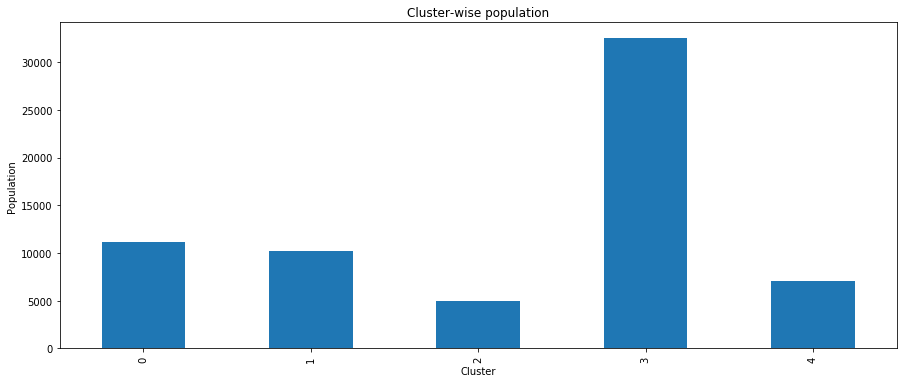

In [543]:
plt.figure(figsize=(15, 6))
clustered_neighbourhood.groupby('Cluster Label').mean()['Population'].plot(kind="bar")
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.title('Cluster-wise population')
plt.show()

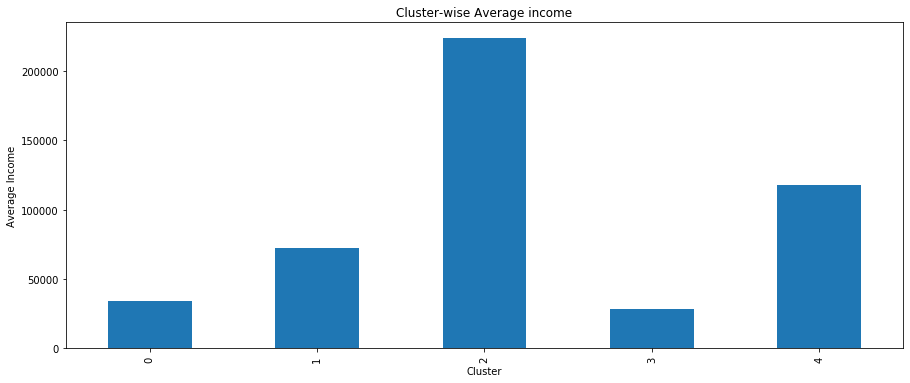

In [556]:
plt.figure(figsize=(15, 6))
clustered_neighbourhood.groupby('Cluster Label').mean()['Income'].plot(kind="bar")
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.title('Cluster-wise Average income')
plt.show()